## Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
iris=pd.read_csv('d:/PyD/Datasets/iris.csv', index_col=0)

In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X=iris.drop(labels='target', axis=1)
y=iris.target
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)

In [ ]:
X_train.head()

__How does KMeans work?__
* By finding center points of clusters. Only Features (X) is required, KMeans is an unsuprevised model!
* Default value is 8 clusters


__How does KMeans fit?__
* Kmeans fits by minimising the inertia.
* Inertia is sum of square distance between samples and their closest cluster center
    * The first step chooses the initial centroids, with the most basic method being to choose K samples from the dataset. 
    * After initialization, K-means consists of looping between the two other steps. 
        * The first step assigns each sample to its nearest centroid. 
        * The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. 
        * The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until  the centroids do not move significantly.
* The intial starting points can significantly affect the results therefore different starting points are tried.        
* n_init, default (10) : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In [11]:
from sklearn.cluster import KMeans
model=KMeans()
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
model.predict(X_test)

array([2, 7, 2, 4, 0, 1, 0, 5, 1, 0, 5, 2, 5, 7, 4, 1, 1, 5, 3, 1, 2, 2,
       2, 1, 0, 3, 6, 5, 5, 3, 4, 2, 1, 1, 0, 2, 7, 0, 6, 2, 0, 3, 1, 7,
       3])

__Every run will give different inertia__

In [13]:
model.inertia_

21.16219988344988

In [14]:
model.n_clusters

8

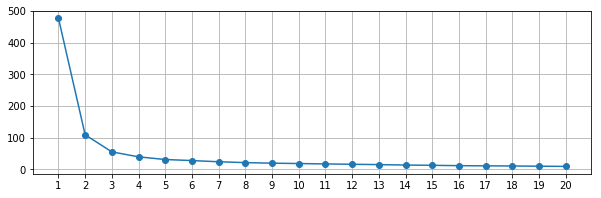

In [15]:
"How many clusters"
inertia=[]
clusters=range(1,21)
for x in clusters:
    model=KMeans(x)
    model.fit(X_train)
    inertia.append(model.inertia_)
plt.figure(figsize=(10,3))
plt.grid(True)
plt.plot(clusters, inertia, '-o')
plt.xticks(clusters)
plt.show()

In [16]:
model=KMeans(3)
model.fit(X_train)
preds=model.predict(X_test)
comparison=pd.DataFrame({'Prediction':preds, 'Actual':y_test})
comparison.head()

,Actual,Prediction
141,2,2
138,2,0
128,2,2
130,2,2
58,1,0


In [17]:
pd.crosstab(comparison.Actual, comparison.Prediction)

Prediction,0,1,2
Actual,,,
0,0,15,0
1,14,0,1
2,3,0,12


__But remeber we would'nt have labels in real life scenario. The crosstab is used just for illustration.__

In [18]:
'Cluster coordinates with respect to each feature and Cluster'
centroids = model.cluster_centers_
centroids

array([[5.87777778, 2.72444444, 4.39333333, 1.44444444],
       [4.97714286, 3.44571429, 1.46571429, 0.25428571],
       [6.844     , 3.064     , 5.812     , 2.08      ]])

In [19]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


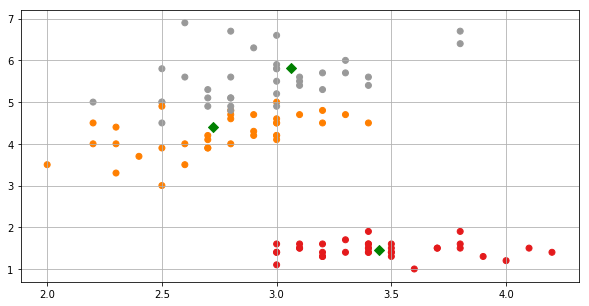

In [22]:
col1 = 1
col2 = 2
plt.figure(figsize=(10,5))
plt.scatter(X_train.iloc[:, col1], X_train.iloc[:, col2], c=y_train, cmap = 'Set1')
plt.scatter(centroids[:, col1], centroids[:, col2], marker='D', s=50, c='green')
plt.grid(True)
plt.show()

__KMeans Benfits from Standard scaler__
 * In Kmeans, feature variance impacts its influence on the model. 
 * If make the variance same then only the actual impact of a feature gets reflected.  

In [23]:
wine=pd.read_csv('wine.csv')
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


__Try with and without standard scaler__

In [25]:
wX=wine.drop(labels=['class_name', 'class_label'], axis=1)

wX=StandardScaler().fit_transform(wX)

wy=wine.class_label
w_X_train, w_X_test, w_y_train, w_y_test= train_test_split(wX,wy, test_size=0.3, random_state=21, stratify=wy)
model=KMeans(3)
model.fit(w_X_train)
ct=pd.crosstab(model.predict(w_X_test), w_y_test)
ct

C:\Users\Apoorv\Anaconda3\envs\trade\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Apoorv\Anaconda3\envs\trade\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


class_label,1,2,3
row_0,,,
0,0,17,0
1,18,2,0
2,0,2,15


__KMeans also benfits from PCA, especially on datasets with large dimensions (features)__

__CMeans Implementation: Library skfuzzy.cmeans__

## Hierarchial Clustering

In [26]:
'Visualising Hierarchies help identify number of clusters'
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

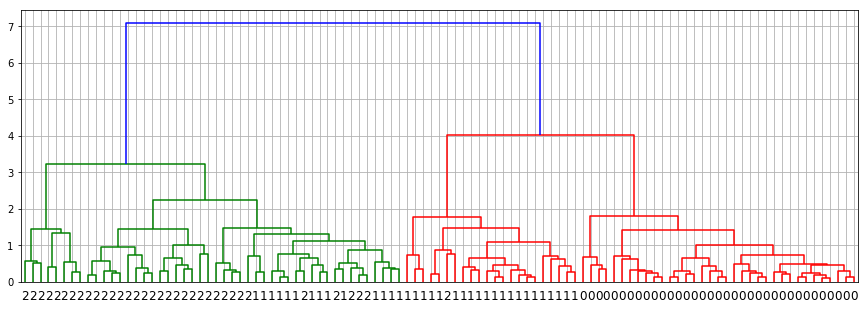

In [34]:
'Linkage does the hierarching'
plt.figure(figsize=(15,5))
mergings=linkage(X_train, method='complete')

'Different Methods:'
'complete is for farthest distance between samples'
'single is for closest distance between samples'
'centroid is for distance between center of clusters'

'Dendogram does the plotting'
dendrogram(mergings,labels=y_train.values, leaf_font_size=12, leaf_rotation=0)
plt.grid(True)
plt.show()

In [36]:
'fcluster helps in clustering'
clusters = fcluster(mergings, 3.5, criterion='distance')
df = pd.DataFrame({'Predictions': clusters, 'Actual': y_train})
ct=pd.crosstab(df.Predictions, df.Actual)
ct

Actual,0,1,2
Predictions,,,
1,0,14,34
2,0,21,1
3,35,0,0


__Again remember we would'nt have access to labels while clustering__

![](https://media.giphy.com/media/xUOrwiqZxXUiJewDrq/giphy.gif)